# SWE546_Final_Project
<br>
<b>Final Project for data mining</b>

As the final project, you will develop a method for recommendation. 

Steps: 
- Form groups of two or three. If you prefer to do so, you can also work alone.
- Analyze the public data set given in http://files.grouplens.org/datasets/movielens/ml-10m-README.html
The goal is to develop a recommendation system, by predicting the ratings for unobserved user-movie pairs. 

You need to submit a report, preferably as an jupyter notebook, that contains: 
- the description of the dataset along with snapshots of visualizations
- a mathematical description of the models that you have developed and any features that you have developed. There must be at least two different methods.
- the code for your simulations, should be runnable 
- a description and discussion of the evaluation criteria,
- an evaluation of your system along with a comparion of the results by the methods you have proposed
- Submit your report with all the material by 3rd June, 19:00 by a pull request

Optional but recommended:
- Present your results at our final meeting in 3rd June, Friday. 19:00

You can also choose another data set, such as data from a kaggle competition such as 
https://www.kaggle.com/c/expedia-hotel-recommendations




<center>
<br>
<br>
<br>
<h1>MovieLens Recommendation System</h1>
<h2>SWE546 Data Mining</h2>
<br>
<br>
<br>
<b>Zeyneb Esendir</b>
<br>
<b>Spring,2016<b>
<br>
<br>
<br>
</center>
<br>
<br>
<h2>INTRODUCTION</h2>
<br>
<br>
<blockquote>
This project is generated by using Python via Jupyter Notebook and MovieLens dataset is used as data source.
The goal of the project is to develop a recommendation system, by predicting the ratings for unobserved user-movie pairs.
<br>
<br>

<b>MovieLens dataset:</b>
<br>

In initial version of this project, MovieLens 10M Dataset is used. However, it caused major problems such as low processing speed or kernel is not responding. Therefore, in order to prevent these problems, MovieLens 1M Dataset is used.
<br><br>

The data files of 1M dataset as follows:
<ol>
<li>users.dat</li>
<li>movies.dat</li>
<li>ratings.dat</li>
</ol>
<br>
*These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.
</blockquote>

<h2>ANALYSING THE DATASET</h2>

Import needed libraries

In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<li style="list-style-type:square"><h3>Analyse data files</h3></li>
<br>
<hr>
<h4 style="color:red">"users.dat"</h4>
<br>
This file contains user information.

In [2]:
userHeader = ['user_id', 'gender', 'age','occupation','zipcode'] 

userData = pd.read_table('data/ml-1m/users.dat', sep='::',header=None,names=userHeader, engine='python')
userData[:5]

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


<br>
<b>Total number of users in the system by gender as follows:</b>



Male      4331
Female    1709
Name: gender, dtype: int64 



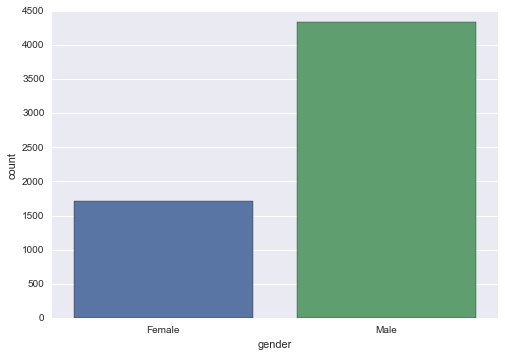

In [3]:
def getGenderStr(x):   
    if x == 'M': return "Male"
    if x == 'F': return "Female"
    return x

userData['gender'] = userData.gender.apply(getGenderStr)

result=userData.gender.value_counts()
print("\n")
print(result,"\n")

sns.countplot(userData.gender)

<br>
<b>Age range of the users in the system as follows:</b>

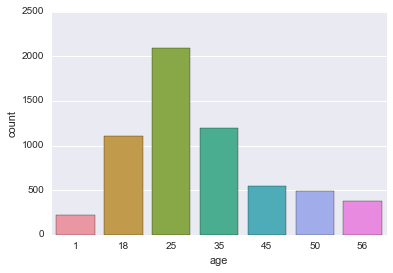

In [17]:
sns.countplot(userData.age)

<br>
<b>Accupations of the users in the system as follows:</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

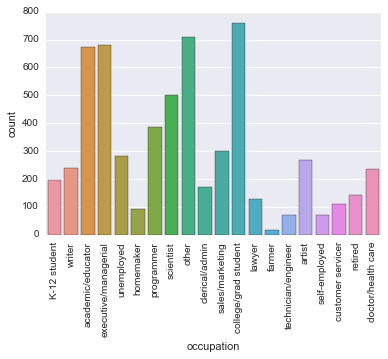

In [28]:
def getOccupationStr(x):   
    if int(x) == 0: return "other"
    if int(x) == 1: return "academic/educator"
    if int(x) == 2: return "artist"
    if int(x) == 3: return "clerical/admin"
    if int(x) == 4: return "college/grad student"
    if int(x) == 5: return "customer servicer"
    if int(x) == 6: return "doctor/health care"
    if int(x) == 7: return "executive/managerial"
    if int(x) == 8: return "farmer"
    if int(x) == 9: return "homemaker"
    if int(x) == 10: return "K-12 student"
    if int(x) == 11: return "lawyer"
    if int(x) == 12: return "programmer"
    if int(x) == 13: return "retired"
    if int(x) == 14: return "sales/marketing"
    if int(x) == 15: return "academic/educator"
    if int(x) == 16: return "writer"
    if int(x) == 17: return "scientist"
    if int(x) == 18: return "self-employed"
    if int(x) == 19: return "technician/engineer"
    if int(x) == 20: return "unemployed"
    return x


#userData['occupation'] = userData.occupation.apply(getOccupationStr)

g=sns.countplot(userData.occupation)
plt.xticks(rotation=90)

<hr>
<h4 style="color:red">"movies.dat"</h4>
<br>
"movies.dat" contains movie information.


In [4]:
movieHeader = ['movie_id', 'title', 'genre'] 

movieData = pd.read_table('data/ml-1m/movies.dat', sep='::',header=None, names=movieHeader,engine='python')
movieData[:5]

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


<hr>
<h4 style="color:red">"ratings.dat"</h4>
<br>
"ratings.dat" contains rating information.


In [5]:
ratingHeader = ['user_id', 'movie_id', 'rating', 'timestamp'] 

ratingData = pd.read_table('data/ml-1m/ratings.dat', sep='::',header=None, names=ratingHeader,engine='python')
ratingData[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


<hr>
<h4 style="color:red">"movieRatings"</h4>
<br>
"movieRatings" is a table created by merging "movies" and "ratings". In this part, the relation between movies and ratings will be analysed and visualized.

In [6]:
movieRatings = pd.merge(movieData, ratingData)
movieRatings[0:5]

,movie_id,title,genre,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


<br>
<br>
<h2>PREDICTIONS</h2>

<hr>
<h3>Method 1: Stochastic Gradient Descent</h3>
<br>


In [3]:
ratings = np.mat(ratingData) #Ys

ratingCount=ratingData.shape[0]  #Ysize
userCount=np.max(ratings[:,0]) +1 #Nr
movieCount=np.max(ratings[:,1]) +1 #Nc

print(' User Count: ', userCount, '\n Movie Count: ', movieCount, '\n Rating Count: ', ratingCount)

 User Count:  6041 
 Movie Count:  3953 
 Rating Count:  1000209


In [4]:
print(ratings)
#Shuffle Ratings
np.random.shuffle(ratings)
print(ratings)

[[        1      1193         5 978300760]
 [        1       661         3 978302109]
 [        1       914         3 978301968]
 ..., 
 [     6040       562         5 956704746]
 [     6040      1096         4 956715648]
 [     6040      1097         4 956715569]]
[[     5642      3396         4 958924902]
 [     2719      1284         5 973287153]
 [     2029      3799         1 974670905]
 ..., 
 [     4303      3699         4 965267387]
 [     5986      2100         3 956890677]
 [     2476      1193         4 974149219]]


In [5]:
# Create A, B matrices by using user and movie count 
A = np.mat(np.random.rand(userCount, 1))
B = np.mat(np.random.rand(1, movieCount))

#Create M and Y matrices (zero matrices) by using user and movie zero matrices
M = np.zeros((userCount, movieCount))
Y = np.zeros((userCount, movieCount))
print(M)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [6]:
for i in range(ratingCount):
    
    # Create the Mask matrix: M[user, movie]
    M[ratings[i,0], ratings[i,1]] = 1
    
    # Create the Y matrix with the original values from the ratings table
    Y[ratings[i,0] , ratings[i,1]] = ratings[i, 2]
    
print(Y)
print(M)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  5.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  3.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


In [7]:
# Create Eta, EPOCH 
EPOCH = 5
Eta = 0.1
eta = Eta

In [8]:
#holds total error
errors=[]
iterationCount= list(range(EPOCH))

for i in range(EPOCH):
    # average error
    E = np.multiply(M, np.subtract(Y, A*B))
    Err = np.sum(np.square(E)) / np.sum(M)
    
     # add to array
    errors.append(Err)
    
    for k in range(10000):
        u = ratings[k,0]
        m = ratings[k,1]
        
        # find error for each point
        err = ratings[k,2] - (A[u,:] * B[:,m])

        
       
        temp_A = A[u,:] + (eta * err[0,0] * B[:,m].T)
        B[:,m]   = B[:,m] + (eta * err[0,0] * A[u,:].T)
        A[u,:]   = temp_A
    
    eta = Eta*1./(i+1)
    
print(errors)  

[12.379711041550063, 4.7974819668009765, 3.4084251220399624, 3.125820719591514, 3.0291390223762318]


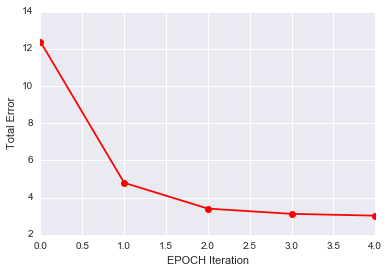

In [13]:
#display errors
plt.plot(iterationCount, errors, 'ro-')
plt.xlabel("EPOCH Iteration")
plt.ylabel("Total Error")
plt.show()

In [35]:
compoundData = A * B
compoundData

matrix([[ 0.19823211,  0.52780875,  0.392842  , ...,  0.29148115,
          0.07501656,  0.52416992],
        [ 0.47276496,  1.25877427,  0.93689126, ...,  0.69515516,
          0.17890744,  1.25009602],
        [ 1.74086738,  4.63519765,  3.44992451, ...,  2.55977711,
          0.65879275,  4.60324165],
        ..., 
        [ 0.64358946,  1.71360807,  1.27541885, ...,  0.94633607,
          0.2435522 ,  1.7017941 ],
        [ 1.6667005 ,  4.43772247,  3.30294599, ...,  2.4507219 ,
          0.63072594,  4.4071279 ],
        [ 1.57858287,  4.20310227,  3.12832086, ...,  2.32115344,
          0.59737977,  4.17412522]])

<br>
<b>Recommended 5 movies for the first 5 user as follows: (as an example data)</b>

In [39]:
# Print data 2 movies of first 5 user
for j in range(5):
    
    userData = [(0,0)]
    
    for m in range (movieCount):
        movieData = (compoundData[j, m], m)
        userData.append(movieData)
        
    userData = sorted(userData, key=lambda tup: tup[0], reverse=True)     
    
    print("\nMovies for User =" , j+1 , " as follows: \n")
    
    for n in range(2):
        print (n+1, "\t", userData[n])


Movies for User = 1  as follows: 

1 	 (0.68255038686227631, 1148)
2 	 (0.64597381163101619, 1262)

Movies for User = 2  as follows: 

1 	 (1.6278185370212457, 1148)
2 	 (1.5405868420017668, 1262)

Movies for User = 3  as follows: 

1 	 (5.9941332364810478, 1148)
2 	 (5.672919052897873, 1262)

Movies for User = 4  as follows: 

1 	 (2.0712309682129404, 1148)
2 	 (1.960237645539104, 1262)

Movies for User = 5  as follows: 

1 	 (2.8154904002439585, 1148)
2 	 (2.6646136321406924, 1262)


<hr>
<h3>Method 2:  k-Nearest Neighbor (Cosine Similarity)</h3>
<br>


First, one high rated movie is selected from rated movies of a random user.
Second, similiar movies of the selected movie are found by using cosine similarity.

In [11]:
def prepareData():
    indexedData = movieRatings.set_index('title')
    filteredData = indexedData.ix[movieRatings['title'].value_counts() > 1]

    titles = filteredData.index.unique()
    userRatings  = filteredData.drop(['timestamp','genre','movie_id'], axis=1)

    temp = userRatings.reset_index().set_index(['title','user_id'])
    temp.index
    source=temp
    return source,titles
    
def getMoviesUsingCosineSimilarity(selectedMovie):

    source,titles = prepareData()
    baseTitle=selectedMovie
    userAvgRating = 2.5
    similiars = []


    for title in titles:
        if baseTitle == title: 
            continue

        baseMovie = source.ix[baseTitle].reset_index()
        movie = source.ix[title].reset_index()

        data = pd.merge(baseMovie, movie, on='user_id').drop('user_id', axis=1)

        diff_xx = data['rating_x'] - userAvgRating
        diff_yy = data['rating_y'] - userAvgRating

        num  = (diff_xx).dot((diff_yy))
        den1 = (diff_xx).dot((diff_xx))
        den2 = (diff_yy).dot((diff_yy))

        similarity = num / np.sqrt(den1*den2)
        if similarity > 1.0:
            similarity = 1.0 

        if pd.isnull(similarity): 
            continue

        similiars += [(similarity, title)]

    similiars.sort()
    similiars.reverse()

    return similiars[0:5]
    


<br>

<b>Recommended 5 movies for random user as follows: (as an example data)</b>

In [12]:
maxRating=5
selectedUser= userData.user_id[0]

userMovies = movieRatings[(movieRatings.user_id == selectedUser) & (movieRatings.rating==5)]
indexed=userMovies.set_index('title')

baseMovies =indexed.index.unique()
selected=baseMovies[0]

print("For this user recommended movies as follows:\n")

if(selected==''):
    print("movie not found")
else:    
    recommendedMovies= getMoviesUsingCosineSimilarity(selected)
    for i in range(5):
        print(recommendedMovies[i], "\n")

For this user recommended movies as follows:

(1.0, 'Zero Kelvin (Kjærlighetens kjøtere) (1995)') 

(1.0, 'Year of the Horse (1997)') 

(1.0, 'Yankee Zulu (1994)') 

(1.0, 'With Friends Like These... (1998)') 

(1.0, 'Very Natural Thing, A (1974)') 



<br>
<h2>CONCLUSION</h2>

After using both algorithms, i have concluded that Stochastic Gradient Descent is faster than kNN.

<i>(I ignored my existing or possible algorithm mistakes while making this comment.  )</i>